# Overfitting Problem
#### Here you need to create a model that overfits, then use different methods to avoid it

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Generate Sample Data

In [18]:
# This function generates random data for 2 different classes

# np.random.seed(0xdeadbeef)

def make_sample(nexamples, means=([0.,0.],[1.,1.]), sigma=1.):
    normal = np.random.multivariate_normal
    # squared width:
    s2 = sigma**2.
    # below, we provide the coordinates of the mean as 
    # a first argument, and then the covariance matrix
    # which describes the width of the Gaussian along the 
    # two directions.
    # we generate nexamples examples for each category
    sgx0 = normal(means[0], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0.,s2]], nexamples)
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

In [19]:
# Don't change the number of samples for your first model.
# After that (For your second model) you can play with the numbers to see how increasing your dataset helps to avoid overfitting

sgx, sgy = make_sample(30)

Text(0, 0.5, 'x2')

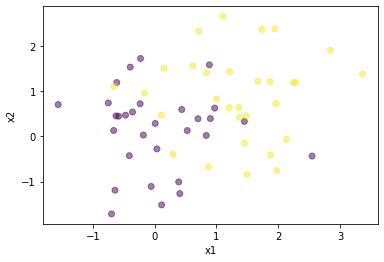

In [21]:
# note how the two categories are plotted
# together in one go by providing the 
# label array as color argument (c=sgy)

plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

### Import Keras

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import KFold

### Create a model that overfits

In [23]:
# Create a Sequential MLP model with these Dense layers:
# 3 hidden layers with 50 units each and 'relu' activation
# 1 unit output with 'softmax' activation

model = Sequential([
    Dense(50, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
########################
## PUT YOUR CODE HERE ##
########################


In [24]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split

X_train, X_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.5)
########################
## PUT YOUR CODE HERE ##
########################

In [25]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
########################

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [26]:
# Start training and fit your model with desired parameters and validation_split=0.2

########################
## PUT YOUR CODE HERE ##
########################

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.7043 - accuracy: 0.5417 - val_loss: 0.6670 - val_accuracy: 0.8333 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 0.6628 - accuracy: 0.7917 - val_loss: 0.6416 - val_accuracy: 0.8333 - 36ms/epoch - 36ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6384 - accuracy: 0.7917 - val_loss: 0.6231 - val_accuracy: 0.8333 - 37ms/epoch - 37ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6183 - accuracy: 0.7917 - val_loss: 0.6075 - val_accuracy: 0.8333 - 36ms/epoch - 36ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6012 - accuracy: 0.7917 - val_loss: 0.5950 - val_accuracy: 0.8333 - 36ms/epoch - 36ms/step
Epoch 6/100
1/1 - 0s - loss: 0.5861 - accuracy: 0.7917 - val_loss: 0.5842 - val_accuracy: 0.8333 - 32ms/epoch - 32ms/step
Epoch 7/100
1/1 - 0s - loss: 0.5727 - accuracy: 0.7917 - val_loss: 0.5746 - val_accuracy: 0.8333 - 38ms/epoch - 38ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5603 - accuracy: 0.7917 - val_loss: 0.5671 - val_accuracy: 0.8333 - 32ms/epoch - 32ms/step
Epoch 9/100
1/1 - 0s - loss:

### Plot Your Results

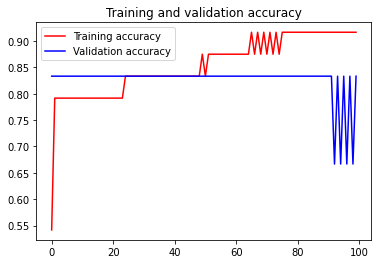

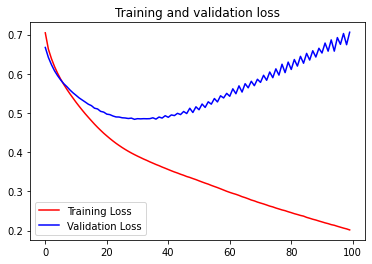

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate your model

In [28]:
# Evaluate your model with train and test data


########################
## PUT YOUR CODE HERE ##
########################

print("train evaluation:")
print(model.evaluate(X_train, y_train))

print("test evaluation:")
print(model.evaluate(X_test, y_test))

train evaluation:
1/1 [==============================] - 0s 27ms/step - loss: 0.3007 - accuracy: 0.9000
[0.3006574511528015, 0.8999999761581421]
test evaluation:
1/1 [==============================] - 0s 28ms/step - loss: 0.7300 - accuracy: 0.6333
[0.7299900650978088, 0.6333333253860474]


# Now you need to use your knowledge and methods (Regularization, Dropout, etc) to prevent overfitting and then evaluate and compare your results

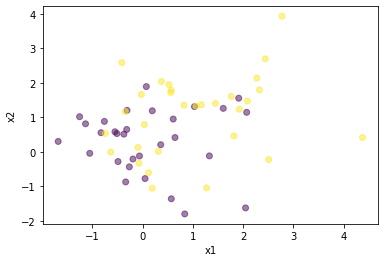

In [49]:
sgx, sgy = make_sample(30)
plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

X_train, X_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.2)

In [50]:
model2 = Sequential([
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model2.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
2/2 - 1s - loss: 0.7114 - accuracy: 0.5263 - val_loss: 0.7178 - val_accuracy: 0.4000 - 1s/epoch - 564ms/step
Epoch 2/100
2/2 - 0s - loss: 0.7043 - accuracy: 0.5263 - val_loss: 0.7060 - val_accuracy: 0.4000 - 34ms/epoch - 17ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6967 - accuracy: 0.5263 - val_loss: 0.6992 - val_accuracy: 0.4000 - 34ms/epoch - 17ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6907 - accuracy: 0.5263 - val_loss: 0.6905 - val_accuracy: 0.5000 - 35ms/epoch - 18ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6923 - accuracy: 0.5526 - val_loss: 0.6828 - val_accuracy: 0.5000 - 42ms/epoch - 21ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6826 - accuracy: 0.5526 - val_loss: 0.6784 - val_accuracy: 0.5000 - 40ms/epoch - 20ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6831 - accuracy: 0.4474 - val_loss: 0.6746 - val_accuracy: 0.5000 - 53ms/epoch - 26ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6770 - accuracy: 0.5000 - val_loss: 0.6717 - val_accuracy: 0.5000 - 40ms/epoch - 20ms/step
Epoch 9/100
2/2 - 0s - lo

In [51]:
print("train evaluation:")
print(model2.evaluate(X_train, y_train))

print("test evaluation:")
print(model2.evaluate(X_test, y_test))

train evaluation:
2/2 [==============================] - 0s 7ms/step - loss: 0.5449 - accuracy: 0.7500
[0.5448781847953796, 0.75]
test evaluation:
1/1 [==============================] - 0s 30ms/step - loss: 0.6527 - accuracy: 0.5000
[0.6527340412139893, 0.5]


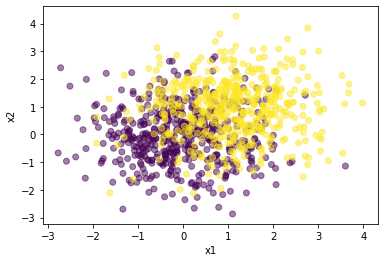

In [56]:
sgx, sgy = make_sample(500)
plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

X_train, X_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.2)

In [57]:
model3 = Sequential([
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model3.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
20/20 - 1s - loss: 0.6102 - accuracy: 0.6391 - val_loss: 0.5774 - val_accuracy: 0.7000 - 792ms/epoch - 40ms/step
Epoch 2/100
20/20 - 0s - loss: 0.5653 - accuracy: 0.7078 - val_loss: 0.5444 - val_accuracy: 0.7500 - 65ms/epoch - 3ms/step
Epoch 3/100
20/20 - 0s - loss: 0.5396 - accuracy: 0.7344 - val_loss: 0.5200 - val_accuracy: 0.7937 - 60ms/epoch - 3ms/step
Epoch 4/100
20/20 - 0s - loss: 0.5091 - accuracy: 0.7547 - val_loss: 0.5015 - val_accuracy: 0.8000 - 60ms/epoch - 3ms/step
Epoch 5/100
20/20 - 0s - loss: 0.4946 - accuracy: 0.7781 - val_loss: 0.4888 - val_accuracy: 0.8062 - 53ms/epoch - 3ms/step
Epoch 6/100
20/20 - 0s - loss: 0.4853 - accuracy: 0.7609 - val_loss: 0.4810 - val_accuracy: 0.8062 - 57ms/epoch - 3ms/step
Epoch 7/100
20/20 - 0s - loss: 0.4803 - accuracy: 0.7656 - val_loss: 0.4756 - val_accuracy: 0.8125 - 57ms/epoch - 3ms/step
Epoch 8/100
20/20 - 0s - loss: 0.4807 - accuracy: 0.7766 - val_loss: 0.4720 - val_accuracy: 0.8125 - 56ms/epoch - 3ms/step
Epoch 9/100
20

In [58]:
print("train evaluation:")
print(model3.evaluate(X_train, y_train))

print("test evaluation:")
print(model3.evaluate(X_test, y_test))

train evaluation:
25/25 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.7800
[0.4633762240409851, 0.7799999713897705]
test evaluation:
7/7 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7350
[0.5700209140777588, 0.7350000143051147]


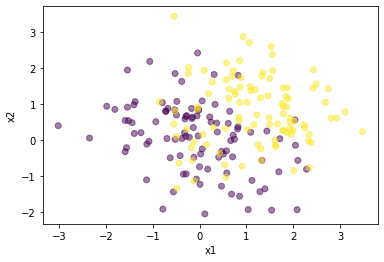

In [94]:
sgx, sgy = make_sample(100)
plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

X_train, X_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.2)

In [95]:
model4 = Sequential([
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model4.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model4.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
4/4 - 1s - loss: 0.6908 - accuracy: 0.4844 - val_loss: 0.6365 - val_accuracy: 0.7500 - 1s/epoch - 314ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6613 - accuracy: 0.5312 - val_loss: 0.6137 - val_accuracy: 0.6875 - 27ms/epoch - 7ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6603 - accuracy: 0.5312 - val_loss: 0.5969 - val_accuracy: 0.7812 - 27ms/epoch - 7ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6217 - accuracy: 0.6953 - val_loss: 0.5773 - val_accuracy: 0.8125 - 26ms/epoch - 7ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6259 - accuracy: 0.6484 - val_loss: 0.5624 - val_accuracy: 0.8125 - 28ms/epoch - 7ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6156 - accuracy: 0.7422 - val_loss: 0.5515 - val_accuracy: 0.8125 - 32ms/epoch - 8ms/step
Epoch 7/100
4/4 - 0s - loss: 0.5993 - accuracy: 0.7266 - val_loss: 0.5382 - val_accuracy: 0.8125 - 37ms/epoch - 9ms/step
Epoch 8/100
4/4 - 0s - loss: 0.5887 - accuracy: 0.7188 - val_loss: 0.5239 - val_accuracy: 0.8125 - 28ms/epoch - 7ms/step
Epoch 9/100
4/4 - 0s - loss: 0.5

In [97]:
print("train evaluation:")
print(model4.evaluate(X_train, y_train))

print("test evaluation:")
print(model4.evaluate(X_test, y_test))

train evaluation:
5/5 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.7937
[0.4012509882450104, 0.793749988079071]
test evaluation:
2/2 [==============================] - 0s 5ms/step - loss: 0.4884 - accuracy: 0.8250
[0.4883851408958435, 0.824999988079071]


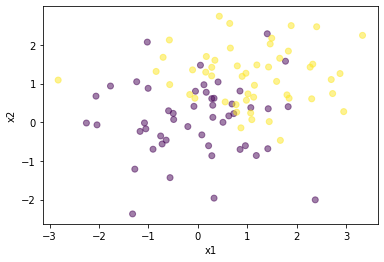

In [110]:
sgx, sgy = make_sample(50)
plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

X_train, X_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.2)

In [112]:
kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1

model5 = Sequential([
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
  ])

model5.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
  

for train, test in kfold.split(X_train, y_train):

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model5.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)

  scores = model5.evaluate(X_train[train], y_train[train], verbose=0)
  print(f'train score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

  scores = model5.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'val score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

  scores = model5.evaluate(X_test, y_test, verbose=0)
  print(f'test score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
train score for fold 1: loss of 0.3652796447277069; accuracy of 81.25%
val score for fold 1: loss of 0.5568507313728333; accuracy of 68.75%
test score for fold 1: loss of 0.42213019728660583; accuracy of 75.0%
------------------------------------------------------------------------
Training for fold 2 ...
train score for fold 2: loss of 0.3662763833999634; accuracy of 81.25%
val score for fold 2: loss of 0.3900366425514221; accuracy of 87.5%
test score for fold 2: loss of 0.4139862060546875; accuracy of 85.00000238418579%
------------------------------------------------------------------------
Training for fold 3 ...
train score for fold 3: loss of 0.4142206013202667; accuracy of 81.25%
val score for fold 3: loss of 0.15013357996940613; accuracy of 100.0%
test score for fold 3: loss of 0.39969488978385925; accuracy of 85.00000238418579%
------------------------------------------------------